In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from catboost import CatBoostClassifier


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
num_trains_rows, num_trains_col = train_data.shape
num_test_rows, num_test_col = test_data.shape

print("Training Data:")
print(f"Количество строк: {num_trains_rows}")
print(f"Количество столбцов: {num_trains_col}\n")

print("Test Data:")
print(f"Количество строк: {num_test_rows}")
print(f"Количество столбцов: {num_test_col}\n")

Training Data:
Количество строк: 165034
Количество столбцов: 14

Test Data:
Количество строк: 110023
Количество столбцов: 13



In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
train_duplicats = train_data.duplicated().sum()
test_duplicats = test_data.duplicated().sum()

print(f"Количество дупликатов в тренировочных данных: {train_duplicats}")
print(f"Количество дупликатов в тестовых данных: {test_duplicats}")

Количество дупликатов в тренировочных данных: 0
Количество дупликатов в тестовых данных: 0


C:\Users\Master\AppData\Local\Temp\ipykernel_17916\1253778238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=train_data, palette=pallet)


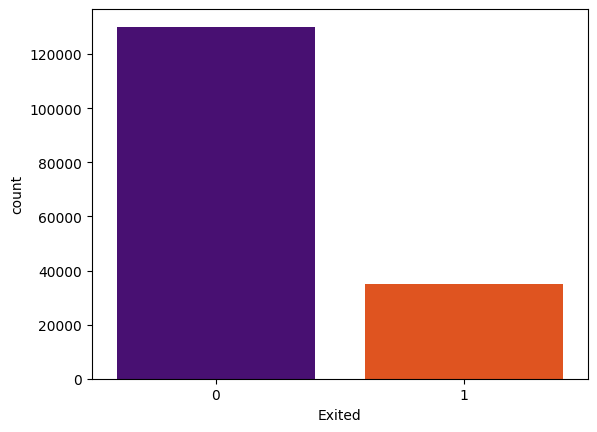

In [7]:
pallet = ['indigo', 'orangered']

sns.countplot(x="Exited", data=train_data, palette=pallet)

plt.show()

In [8]:
num_colums = ['CreditScore','Balance','EstimatedSalary','Age','NumOfProducts', "Tenure"]
cat_colums = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember' ]

In [9]:
gender_column = train_data['Gender']

print(f"В данной колонке находятся значения {gender_column.unique()}")

enc = LabelEncoder()
gender_column_encoded = enc.fit_transform(gender_column)

print(f"В данной колонке находятся значения {np.unique(gender_column_encoded)}")

В данной колонке находятся значения ['Male' 'Female']
В данной колонке находятся значения [0 1]


In [10]:
for cat_feat in cat_colums:
    train_data[cat_feat] = enc.fit_transform(train_data[cat_feat])
    test_data[cat_feat] = enc.fit_transform(test_data[cat_feat])

test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,0,0,23.0,2,0.00,2,0,1,160976.75
1,165035,15782418,Nott,683,0,0,46.0,2,0.00,1,1,0,72549.27
2,165036,15807120,K?,656,0,0,34.0,7,0.00,2,1,0,138882.09
3,165037,15808905,O'Donnell,681,0,1,36.0,8,0.00,1,1,0,113931.57
4,165038,15607314,Higgins,752,1,1,38.0,10,121263.62,1,1,0,139431.00


In [11]:
sc = StandardScaler()

for col in num_colums:
    train_data[col] = sc.fit_transform(train_data[[col]])
    test_data[col] = sc.fit_transform(test_data[[col]])

test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,-0.878176,0,0,-1.706504,-1.067887,-0.881274,0.820030,0,1,0.967874
1,165035,15782418,Nott,0.329567,0,0,0.888990,-1.067887,-0.881274,-1.015806,1,0,-0.790939
2,165036,15807120,K?,-0.006609,0,0,-0.465181,0.713922,-0.881274,0.820030,1,0,0.528413
3,165037,15808905,O'Donnell,0.304665,0,1,-0.239486,1.070284,-0.881274,-1.015806,1,0,0.032150
4,165038,15607314,Higgins,1.188684,1,1,-0.013791,1.783008,1.050038,-1.015806,1,0,0.539331


In [12]:
train_data.drop(['id', 'Surname', 'CustomerId'], inplace=True, axis=1)
y_id = test_data['id']
test_data.drop(['id', 'Surname', 'CustomerId'], inplace=True, axis=1)

In [13]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.144135,0,1,-0.578074,-0.719973,-0.883163,0.814298,1,0,1.369486,0
1,-0.367706,0,1,-0.578074,-1.432694,-0.883163,0.814298,1,1,-1.254085,0
2,0.268974,0,1,0.211354,1.774548,-0.883163,0.814298,1,0,1.437422,0
3,-0.941966,0,1,-0.465299,-1.076334,1.486918,-1.013348,1,1,-0.557018,0
4,0.743362,2,1,-0.578074,-0.007253,-0.883163,0.814298,1,1,-1.938770,0


In [14]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf.predict(X_val)


In [16]:
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.3, depth=6, silent=True)
catboost_model.fit(X_train, y_train)

# Предсказания
y_pred_catboost = catboost_model.predict(X_val)
pred_catboost = catboost_model.predict(test_data)

In [17]:
def accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Error rate: {error_rate:.4f}')
    return accuracy

print("Случайный лес")
accuracy(y_val, y_pred_rf)

print("\nCat_Boost")
accuracy(y_val, y_pred_catboost)

Случайный лес
Accuracy: 0.8587
Error rate: 0.1413

Cat_Boost
Accuracy: 0.8677
Error rate: 0.1323


0.8676947314206077

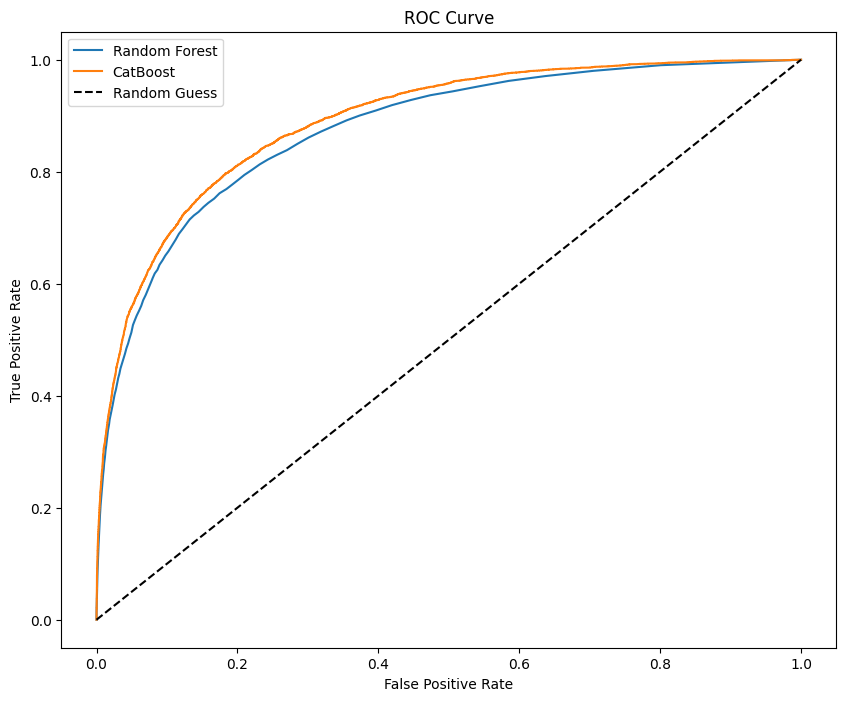

In [18]:
def plot_roc_curve(model, X_val, y_val):
    y_probs = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_probs)
    return fpr, tpr

fpr_rf, tpr_rf = plot_roc_curve(rf, X_val, y_val)
fpr_catboost, tpr_catboost = plot_roc_curve(catboost_model, X_val, y_val)

# Построение ROC-кривой
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_catboost, tpr_catboost, label='CatBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [19]:
# Оценка случайного леса
print("\nСлучайный лес")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred_rf):4f}")

# Оценка CatBoost
print("\nCatBoost")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred_catboost):4f}")


Случайный лес
ROC AUC: 0.743064

CatBoost
ROC AUC: 0.753612


In [22]:
output = pd.DataFrame({
    'id': y_id,
    'Exited': pred_catboost
})
output.to_csv('submission.csv', index=False)